# 세상에서 가장 쉬운 AI 이미지 생성 - Stable Diffusion

https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/

```
@misc{wood2022kerascv,
  title={KerasCV},
  author={Wood, Luke and Tan, Zhenyu and Ian, Stenbit and Zhu, Scott and Chollet, Fran\c{c}ois and others},
  year={2022},
  howpublished={\url{https://github.com/keras-team/keras-cv}},
}
```

In [ ]:
!nvidia-smi

Tue Jul 25 03:31:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade keras-cv keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import keras_cv
import matplotlib.pyplot as plt

Using TensorFlow backend


## Stable Diffusion 모델 로드

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512, jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()

## 첫 번째 이미지 생성

> 우주인이 말을 타고 있는 사진

198180272/198180272 [==============================] - 1s 0us/step


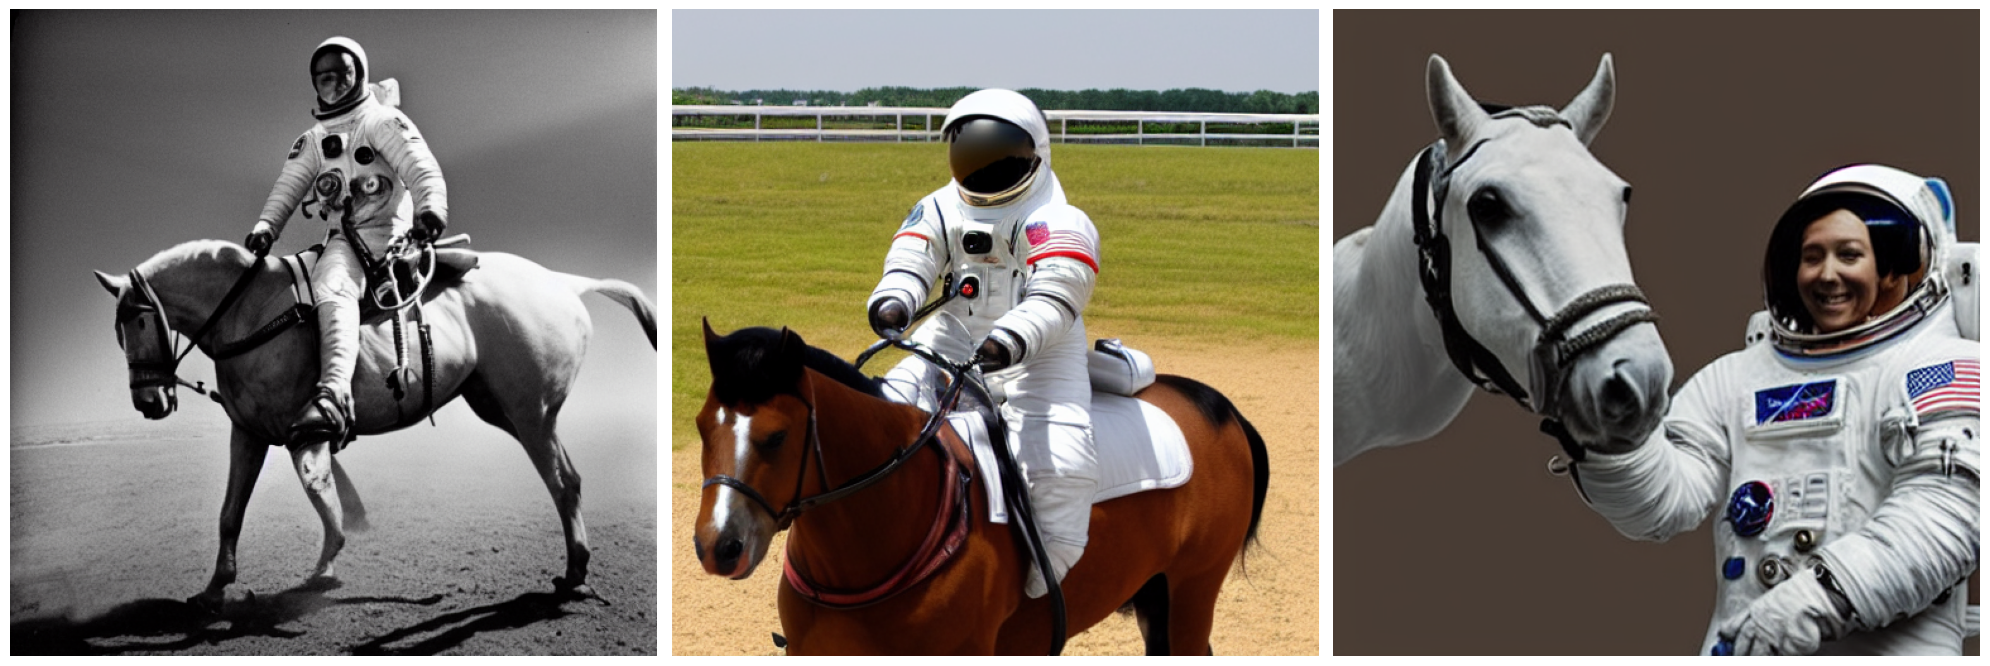

In [ ]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)

plot_images(images)

## 한글 -> 영어 번역

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

translation = translator.translate("장미 정원에서 아이들이 뛰어오는 모습")

translation

'Kids jumping in rose gardens'

## 함수화

In [ ]:
def generate_images(text, n=3):
    print(text)
    translation = translator.translate(text)
    print(translation)

    images = model.text_to_image(translation, batch_size=n)

    return images

images = generate_images("장미 정원에서 아이들이 뛰어오는 모습")

plot_images(images)

## 그림 생성 앱 만들기

In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.7 MB/s eta 0

In [ ]:
import gradio as gr

def inference(text):
    image = generate_images(text, 1).squeeze()
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5be10f6dc867fb9b32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


호랑이
Tiger
50/50 [==============================] - 45s 131ms/step
